In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [5]:
df = pd.read_excel("PokemonIndex.xlsx")

In [6]:
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25,2.0,0.690,69,20:00,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,NaN,0.042,4,07:00,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,0,NaN,0.017,2,11:30,0,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25,2.0,0.253,25,08:45,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100,NaN,0.012,1,19:00,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    int64  
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    float64
 6   weight          151 non-null    float64
 7   candy           151 non-null    object 
 8   candy_count     151 non-null    int64  
 9   egg             73 non-null     float64
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    int64  
 12  spawn_time      145 non-null    object 
 13  multipliers     151 non-null    object 
 14  weaknesses      151 non-null    object 
 15  next_evolution  70 non-null     object 
 16  prev_evolution  72 non-null     object 
dtypes: float64(4), int64(4), object(9)


In [8]:
df.shape

(151, 17)

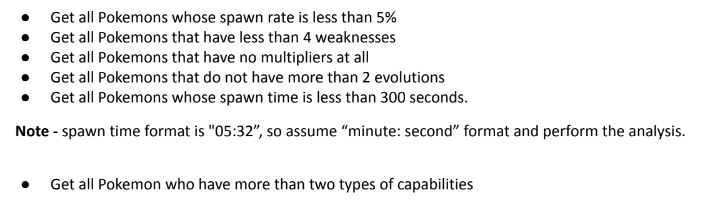

## 1) Get all the Pokemon Whose Spawn rate is less than 5%

In [9]:
df[df['spawn_chance']<0.05]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,NaN,0.0420,4,07:00,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,0,NaN,0.0170,2,11:30,0,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100,NaN,0.0120,1,19:00,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70,90.5,Charmander Candy,0,NaN,0.0031,0,13:34,0,"['Water', 'Electric', 'Rock']",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':..."
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,['Water'],0.99,22.5,Squirtle Candy,100,NaN,0.0340,3,07:02,[1],"['Electric', 'Grass']","[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01,60.0,None,0,NaN,0.0000,0,NaN,0,"['Water', 'Electric', 'Rock']",NaN,NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99,16.5,Dratini Candy,100,NaN,0.0200,2,11:57,[2],"['Ice', 'Dragon', 'Fairy']","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21,210.0,Dratini Candy,0,NaN,0.0011,0,23:38,0,"['Ice', 'Rock', 'Dragon', 'Fairy']",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01,122.0,None,0,NaN,0.0000,0,NaN,0,"['Bug', 'Ghost', 'Dark']",NaN,NaN


In [10]:
df['spawn_chance'].value_counts()

0.0000    6
0.0120    5
0.0220    4
0.0170    4
0.0200    4
         ..
0.0097    1
0.0640    1
6.5200    1
0.3900    1
0.0011    1
Name: spawn_chance, Length: 104, dtype: int64

Although we did get all the pokemons that have spawn chance less than 5%, but we can't make a plot out of it properly. 

So, let's create a copy of this df and change the values of the feature 'spawn_chance' so that we can make a plot for visualization.

In [11]:
df_copy = df.copy()

df_copy.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25,2.0,0.690,69,20:00,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,NaN,0.042,4,07:00,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,0,NaN,0.017,2,11:30,0,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25,2.0,0.253,25,08:45,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100,NaN,0.012,1,19:00,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [12]:
# df_copy['spawn_chance'] = df_copy['spawn_chance'].astype('object')

In [13]:
for i in df_copy['spawn_chance']:
    if i < 0.05:
        df_copy['spawn_chance'] = df_copy['spawn_chance'].replace(i, "<5%")
    else:
        df_copy['spawn_chance'] = df_copy['spawn_chance'].replace(i, ">=5%")

In [14]:
df_copy.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25,2.0,>=5%,69,20:00,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,NaN,<5%,4,07:00,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,0,NaN,<5%,2,11:30,0,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25,2.0,>=5%,25,08:45,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100,NaN,<5%,1,19:00,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


c:\Users\OmGusain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spawn_chance', ylabel='count'>

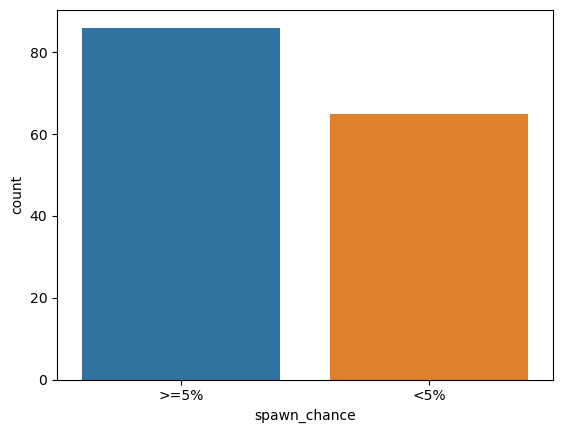

In [15]:
sns.countplot(df_copy['spawn_chance'])

<AxesSubplot:title={'center':'Spawn Chances of Different Pokemons'}, ylabel='spawn_chance'>

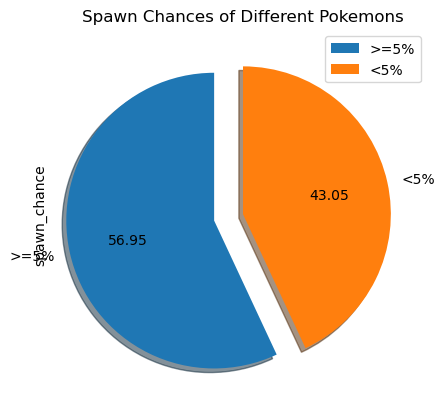

In [16]:
df_copy['spawn_chance'].value_counts().plot.pie(startangle =90, explode = (0.2, 0), title = "Spawn Chances of Different Pokemons", legend=True, autopct="%.2f", shadow = True)

#### Conclusion: There are more than 80(59.95%) Pokemon Who have spawn chance of more than or equal to 5% and a bit more than 60(43.05%) pokemons with spawn chances less than 5%.

## 2) Get all the pokemons that have less than 4 weaknesses

In [17]:
df_copy.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25,2.0,>=5%,69,20:00,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,NaN,<5%,4,07:00,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,0,NaN,<5%,2,11:30,0,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25,2.0,>=5%,25,08:45,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100,NaN,<5%,1,19:00,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


For this, I will create a new feature which will have 2 categories. 1st category will be Pokemons with less than 4 weaknesses. The other Category will be Pokemons with more than or equal to 4 weaknesses.

This way We can better visualize things using Plots.

In [18]:
no_weakness = [len(i.split(", ")) for i in df_copy['weaknesses']]

In [19]:
no_weakness

[4,
 4,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 5,
 4,
 4,
 4,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 3,
 3,
 2,
 2,
 4,
 2,
 2,
 4,
 1,
 1,
 3,
 3,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 4,
 4,
 3,
 3,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 6,
 6,
 6,
 3,
 3,
 5,
 5,
 3,
 3,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 6,
 3,
 3,
 2,
 2,
 1,
 1,
 7,
 7,
 3,
 3,
 3,
 3,
 1,
 2,
 2,
 6,
 6,
 1,
 5,
 1,
 2,
 2,
 2,
 2,
 2,
 5,
 3,
 5,
 6,
 1,
 3,
 3,
 1,
 2,
 2,
 4,
 1,
 1,
 2,
 1,
 3,
 1,
 4,
 4,
 4,
 4,
 5,
 1,
 4,
 2,
 3,
 3,
 3,
 4,
 3,
 3]

In [20]:
df_copy['no_of_weaknesss'] = no_weakness

In [21]:
df_copy.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,no_of_weaknesss
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25,2.0,>=5%,69,20:00,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,NaN,<5%,4,07:00,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,0,NaN,<5%,2,11:30,0,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25,2.0,>=5%,25,08:45,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100,NaN,<5%,1,19:00,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3


<AxesSubplot:xlabel='no_of_weaknesss', ylabel='Count'>

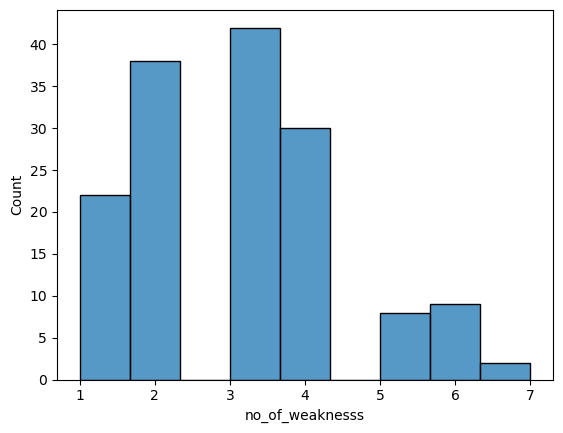

In [22]:
sns.histplot(df_copy['no_of_weaknesss'])

c:\Users\OmGusain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_weaknesss', ylabel='count'>

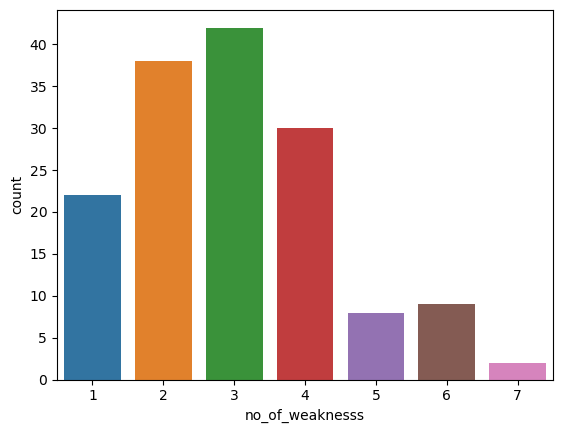

In [23]:
sns.countplot(df_copy['no_of_weaknesss'])

This is a countplot that came as a result of our newly added feature. We can see that there are more than 40 pokemons with 3 weaknesses, more than 35 pokemons with 2 weaknesses and more than 20 pokemons with 1 weakness.

In [24]:
df_copy.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,no_of_weaknesss
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25,2.0,>=5%,69,20:00,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,NaN,<5%,4,07:00,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,0,NaN,<5%,2,11:30,0,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25,2.0,>=5%,25,08:45,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100,NaN,<5%,1,19:00,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3


In [25]:
df_copy['no_of_weaknesss'].unique()

array([4, 3, 2, 5, 1, 6, 7], dtype=int64)

<AxesSubplot:title={'center':'No Of Weaknesses'}, ylabel='no_of_weaknesss'>

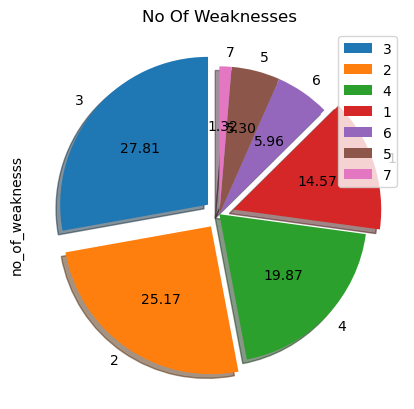

In [26]:
# Let's Try to get a pie chart of the number of weaknesses of pokemons.

df_copy['no_of_weaknesss'].value_counts().plot.pie(startangle =90, explode = (0.1,0.1,0,0.1,0,0,0), title = "No Of Weaknesses", legend=True, autopct="%.2f", shadow = True)

These are the percentage of pokemons with weaknesses less than 4. 

To Make it even more precise percentage, we can make a new feature in df_copy and make a pie plot using that.

In [27]:
df_copy['lt_or_gt_4'] = df_copy['no_of_weaknesss']

In [28]:
for i in df_copy['lt_or_gt_4']:
    if i < 4:
        df_copy['lt_or_gt_4'] = df_copy['lt_or_gt_4'].replace(i, "<4")
    else:
        df_copy['lt_or_gt_4'] = df_copy['lt_or_gt_4'].replace(i, ">=4")

<AxesSubplot:title={'center':'Percentage Of Pokemons with Less than 4 Weaknesses'}, ylabel='lt_or_gt_4'>

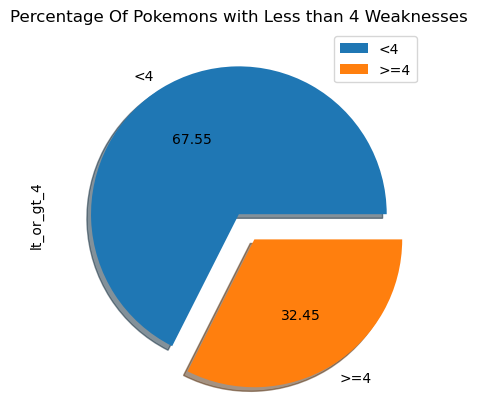

In [29]:
df_copy['lt_or_gt_4'].value_counts().plot.pie(explode = (0, 0.2), title = "Percentage Of Pokemons with Less than 4 Weaknesses", legend=True, autopct="%.2f", shadow = True)

#### Conclusion: Now, We can see there are a total of 67.55% pokemons in the Pokemon index dataset, that have less than 4 weaknesses and 32.45% Pokemons with more than or equal to 4 weaknesses.

# Get all the Pokemons with no Multipliers

In [30]:
df_copy['multipliers']

0         [2]
1      [1, 2]
2           0
3         [2]
4         [2]
        ...  
146    [2, 2]
147       [2]
148         0
149         0
150         0
Name: multipliers, Length: 151, dtype: object

Now, to plot this, We can go with 2 approaches.

1) Create a new Feature which has the number of multipliers each pokemon has. Using this new feature, we can create, histplot, countplot and even Pie Plot. 

2) Create a new feature in which there are 2 categories, Yes and No. It will be "yes" if a pokemon has Multipliers, and "No" if the pokemon doesn't have a multiplier. With this approach as well, we can get countplot, hisplot, as well as pie plot But they will not be much detailed.

For The sake of this problem, let's go with the first approach so that we can get as many and as detailed plot we can.

In [31]:
df_copy['no_of_multipliers'] = [len(i.split(", ")) if type(i)==str else 0 for i in df_copy['multipliers']]

In [32]:
df_copy.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,no_of_weaknesss,lt_or_gt_4,no_of_multipliers
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25,2.0,>=5%,69,20:00,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4,>=4,1
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,NaN,<5%,4,07:00,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4,>=4,2
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,0,NaN,<5%,2,11:30,0,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4,>=4,0
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25,2.0,>=5%,25,08:45,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3,<4,1
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100,NaN,<5%,1,19:00,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3,<4,1


c:\Users\OmGusain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_multipliers', ylabel='count'>

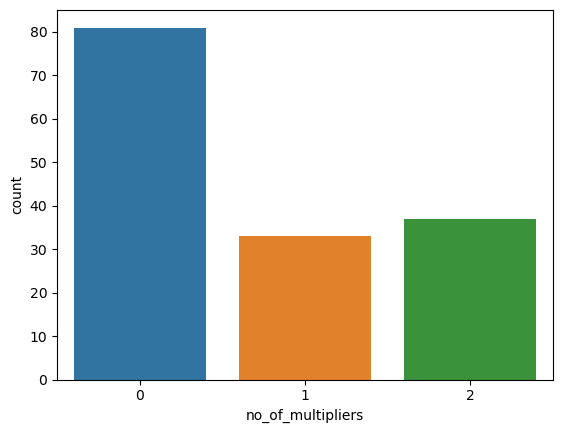

In [33]:
sns.countplot(df_copy['no_of_multipliers'])

<AxesSubplot:xlabel='no_of_multipliers', ylabel='Count'>

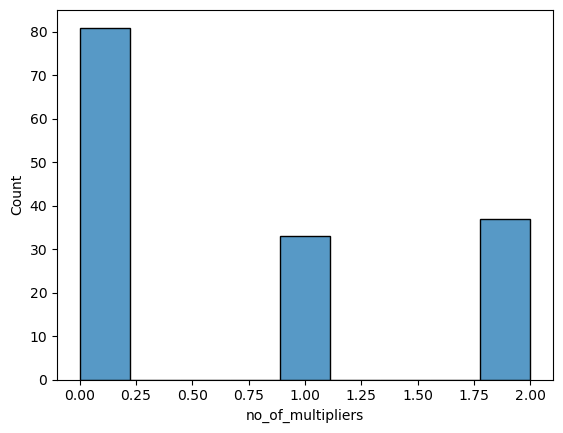

In [34]:
sns.histplot(df_copy['no_of_multipliers'])

<AxesSubplot:title={'center':'No of Multiplier'}, ylabel='no_of_multipliers'>

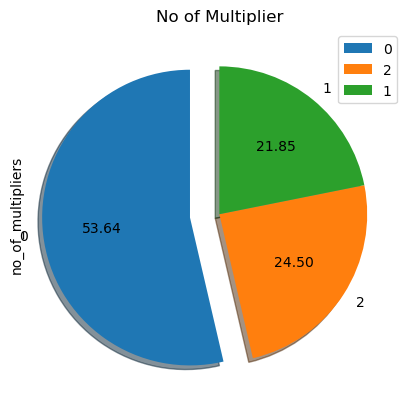

In [35]:
df_copy['no_of_multipliers'].value_counts().plot.pie(startangle = 90, legend = True, autopct = "%.2f", title = "No of Multiplier", shadow = True, explode = (0.2, 0, 0))

# Conclusion: From these plots, we can conclude that there are more than 80 Pokemons (53.64%) with no multipliers. 

I will be honest, I have no idea how to do this. But I do think i have a plan on how I can possibly solve this.

In [36]:
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25,2.0,0.690,69,20:00,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,NaN,0.042,4,07:00,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,0,NaN,0.017,2,11:30,0,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25,2.0,0.253,25,08:45,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100,NaN,0.012,1,19:00,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [37]:
df_copy[['name', 'next_evolution', 'prev_evolution']]

,name,next_evolution,prev_evolution
0,Bulbasaur,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,Ivysaur,"[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,Venusaur,NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,Charmander,"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,Charmeleon,"[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...,...
146,Dratini,"[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,Dragonair,"[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,Dragonite,NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,Mewtwo,NaN,NaN


My goal is to get each unique pokemon, with either 2 evolution or none. What i mean by this is every pokemon has a base form from which it can further evolve into maybe 2 or 3 other pokemon. I will only count the base pokemon as a unique pokemon, not the Evolution version of those pokemon.

For Ex: bulbasaur is the base form, and it can evolve into ivysaur and venosaur. So, I will only count Bulbasaur if it has 3, 2, or no evolution in this problem. 

But, for now I can't even get the the names from the prev_evolution and even next_evolution as they are in string and not dict 

In [38]:
df['prev_evolution'].iloc[2]

"[{'num': '001', 'name': 'Bulbasaur'}, {'num': '002', 'name': 'Ivysaur'}]"

So, I decided to use and entirely different approach. I will once again get the json Data from the Link that I have.

In [39]:
import requests

url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
r = requests.get(url)
data = r.json()

In [40]:
pokemons = data['pokemon']

In [41]:
pokemons[0]

{'id': 1,
 'num': '001',
 'name': 'Bulbasaur',
 'img': 'http://www.serebii.net/pokemongo/pokemon/001.png',
 'type': ['Grass', 'Poison'],
 'height': '0.71 m',
 'weight': '6.9 kg',
 'candy': 'Bulbasaur Candy',
 'candy_count': 25,
 'egg': '2 km',
 'spawn_chance': 0.69,
 'avg_spawns': 69,
 'spawn_time': '20:00',
 'multipliers': [1.58],
 'weaknesses': ['Fire', 'Ice', 'Flying', 'Psychic'],
 'next_evolution': [{'num': '002', 'name': 'Ivysaur'},
  {'num': '003', 'name': 'Venusaur'}]}

In [42]:
evol_pokemon = dict()
prev_pokemon = ""

Now, I will go through every dictionary in the pokemons list.

In [43]:
for i in pokemons:
    # If the dictionary is empty, then add the first pokemon and a list of its all evolutions
    if len(evol_pokemon)==0:
        evol_pokemon[i['name']] = [j['name'] for j in i['next_evolution']]
        # The name of the pokemon will be saved in the variable prev_pokemon
        prev_pokemon = i['name']
    else:
        #Now, if the dictionary is not empty, then check if the name of the pokemon is already inside the list of evolutions of the previous pokemon. 
        #If its not in that list, then make a new Key with that pokemon's name and the value of that key will be all the evolutions it has.
        try:
            # I have put a try block because not every pokemon has a key 'next_evolution' as they don't have any evolution.
            # So, this program will definitely give an error and stop midway. So, here is a try and except block.
            if evol_pokemon[prev_pokemon].count(i['name'])==0:
                # Now we will only enter inside this if block if the pokemon's name is not inside the list of previous pokemon's evolutions.
                evol_pokemon[i['name']] = [j['name'] for j in i['next_evolution']]
                prev_pokemon = i['name']
        except:
            # When we enter this except block, that means the program has encountered a pokemon with no evolutions.
            # So, this block will create a new key with that pokemon's name and the value will be a list which has the name of itself. 
            evol_pokemon[i['name']] = [i['name']]

    

In [44]:
evol_pokemon

{'Bulbasaur': ['Ivysaur', 'Venusaur'],
 'Charmander': ['Charmeleon', 'Charizard'],
 'Squirtle': ['Wartortle', 'Blastoise'],
 'Caterpie': ['Metapod', 'Butterfree'],
 'Weedle': ['Kakuna', 'Beedrill'],
 'Pidgey': ['Pidgeotto', 'Pidgeot'],
 'Rattata': ['Raticate'],
 'Spearow': ['Fearow'],
 'Ekans': ['Arbok'],
 'Pikachu': ['Raichu'],
 'Sandshrew': ['Sandslash'],
 'Nidoran ♀ (Female)': ['Nidorina', 'Nidoqueen'],
 'Nidoran ♂ (Male)': ['Nidorino', 'Nidoking'],
 'Clefairy': ['Clefable'],
 'Vulpix': ['Ninetales'],
 'Jigglypuff': ['Wigglytuff'],
 'Zubat': ['Golbat'],
 'Oddish': ['Gloom', 'Vileplume'],
 'Paras': ['Parasect'],
 'Venonat': ['Venomoth'],
 'Diglett': ['Dugtrio'],
 'Meowth': ['Persian'],
 'Psyduck': ['Golduck'],
 'Mankey': ['Primeape'],
 'Growlithe': ['Arcanine'],
 'Poliwag': ['Poliwhirl', 'Poliwrath'],
 'Abra': ['Kadabra', 'Alakazam'],
 'Machop': ['Machoke', 'Machamp'],
 'Bellsprout': ['Weepinbell', 'Victreebel'],
 'Tentacool': ['Tentacruel'],
 'Geodude': ['Graveler', 'Golem'],
 'Pony

As you can see, it worked. I have everything I need. Now I will create a new data frame using this data.

In [45]:
new_dict = {'Name': list(evol_pokemon.keys()),
            'Evolutions': list(evol_pokemon.values())}

In [46]:
df2 = pd.DataFrame(new_dict)

In [47]:
df2.head()

,Name,Evolutions
0,Bulbasaur,"[Ivysaur, Venusaur]"
1,Charmander,"[Charmeleon, Charizard]"
2,Squirtle,"[Wartortle, Blastoise]"
3,Caterpie,"[Metapod, Butterfree]"
4,Weedle,"[Kakuna, Beedrill]"


In [48]:
# Let's create a new column which will have the number of evolution of each pokemon.

df2['no_of_evols'] = [len(i) if len(i)>1 else 0 for i in df2['Evolutions']]

In [49]:
df2.head()

,Name,Evolutions,no_of_evols
0,Bulbasaur,"[Ivysaur, Venusaur]",2
1,Charmander,"[Charmeleon, Charizard]",2
2,Squirtle,"[Wartortle, Blastoise]",2
3,Caterpie,"[Metapod, Butterfree]",2
4,Weedle,"[Kakuna, Beedrill]",2


In [50]:
#These are the unique values of the new column. We only need the pokemon with 1 and 2 evolutions.
df2['no_of_evols'].unique()

array([2, 0, 3], dtype=int64)

In [51]:
#These are all the pokemon with only 2 or 0 evolutions.

df2[df2['no_of_evols']<3]

,Name,Evolutions,no_of_evols
0,Bulbasaur,"[Ivysaur, Venusaur]",2
1,Charmander,"[Charmeleon, Charizard]",2
2,Squirtle,"[Wartortle, Blastoise]",2
3,Caterpie,"[Metapod, Butterfree]",2
4,Weedle,"[Kakuna, Beedrill]",2
...,...,...,...
74,Zapdos,[Zapdos],0
75,Moltres,[Moltres],0
76,Dratini,"[Dragonair, Dragonite]",2
77,Mewtwo,[Mewtwo],0


In [52]:
# Let's see how many pokemon meet the criteria
df2[df2['no_of_evols']<3].shape

(78, 3)

c:\Users\OmGusain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_evols', ylabel='count'>

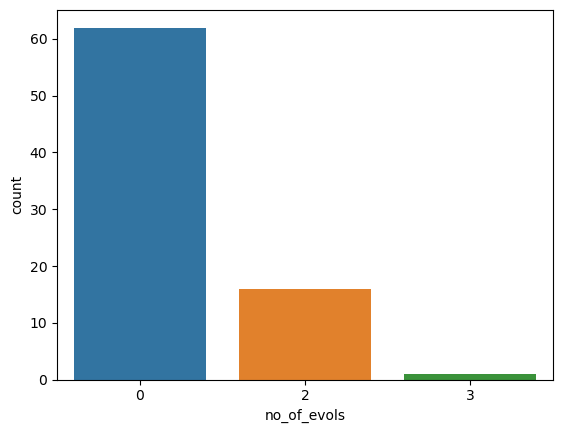

In [53]:
sns.countplot(df2['no_of_evols'])

<AxesSubplot:xlabel='no_of_evols', ylabel='Count'>

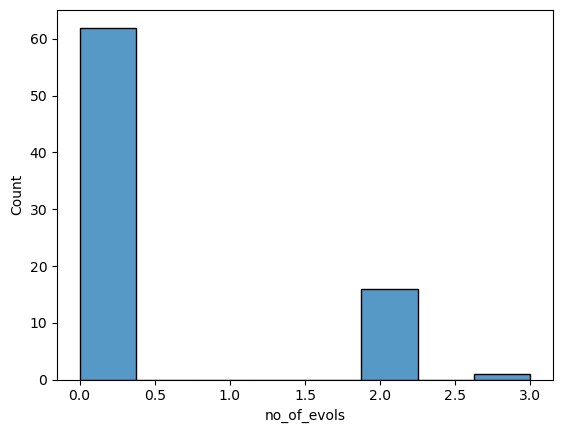

In [54]:
sns.histplot(df2['no_of_evols'])

In [55]:
df2['no_of_evols'].value_counts(normalize=True)*100

0    78.481013
2    20.253165
3     1.265823
Name: no_of_evols, dtype: float64

<AxesSubplot:title={'center':'No of Evolutions'}, ylabel='no_of_evols'>

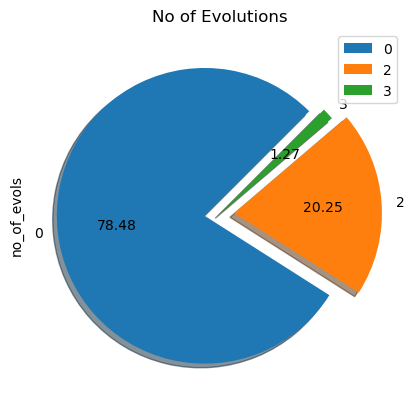

In [56]:
df2['no_of_evols'].value_counts().plot.pie(startangle=45, legend=True, shadow=True, autopct='%.2f', title="No of Evolutions", explode=(0.1, 0.1, 0))

#### Conclusion: A total of 78 or 98.73% of pokemons have either no evolution or total of 2 evolutions. Only 1.27% of the remaining unique pokemons have 3 evolutions. 

## Get All the Pokemons with Spawn time less than 300 seconds

In [58]:
df_copy.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,no_of_weaknesss,lt_or_gt_4,no_of_multipliers
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25,2.0,>=5%,69,20:00,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4,>=4,1
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,NaN,<5%,4,07:00,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4,>=4,2
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,0,NaN,<5%,2,11:30,0,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4,>=4,0
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25,2.0,>=5%,25,08:45,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3,<4,1
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100,NaN,<5%,1,19:00,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3,<4,1


First, let's try to get the spawn time in seconds first. 

In [61]:
df_copy['spawn_time'] = df_copy['spawn_time'].str.replace(":", "")

In [62]:
df_copy.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,no_of_weaknesss,lt_or_gt_4,no_of_multipliers
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25,2.0,>=5%,69,2000,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4,>=4,1
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,NaN,<5%,4,0700,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4,>=4,2
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,0,NaN,<5%,2,1130,0,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4,>=4,0
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25,2.0,>=5%,25,0845,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3,<4,1
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100,NaN,<5%,1,1900,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3,<4,1


In [64]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 151 non-null    int64  
 1   num                151 non-null    int64  
 2   name               151 non-null    object 
 3   img                151 non-null    object 
 4   type               151 non-null    object 
 5   height             151 non-null    float64
 6   weight             151 non-null    float64
 7   candy              151 non-null    object 
 8   candy_count        151 non-null    int64  
 9   egg                73 non-null     float64
 10  spawn_chance       151 non-null    object 
 11  avg_spawns         151 non-null    int64  
 12  spawn_time         145 non-null    object 
 13  multipliers        151 non-null    object 
 14  weaknesses         151 non-null    object 
 15  next_evolution     70 non-null     object 
 16  prev_evolution     72 non-

As We can see, There are a few Nan values in ['spawn_time']. So when we try to do the following work, the program will give us error. So, let's use try and except block to handle it.

In [69]:
spawn_sec = list()

In [70]:
for i in df_copy['spawn_time']:
    try:
        spawn_sec.append(int(i[0:2])*60 + int(i[2:]))
    except:
        spawn_sec.append(0)

In [71]:
spawn_sec

[1200,
 420,
 690,
 525,
 1140,
 814,
 265,
 422,
 6,
 995,
 131,
 323,
 141,
 150,
 290,
 94,
 90,
 110,
 115,
 116,
 745,
 71,
 740,
 110,
 240,
 1438,
 118,
 754,
 111,
 442,
 755,
 72,
 542,
 736,
 210,
 209,
 823,
 92,
 526,
 748,
 748,
 135,
 238,
 693,
 1438,
 102,
 82,
 151,
 1420,
 142,
 757,
 174,
 164,
 221,
 1386,
 772,
 753,
 237,
 191,
 220,
 554,
 92,
 270,
 685,
 753,
 115,
 632,
 175,
 250,
 585,
 739,
 200,
 1416,
 760,
 293,
 736,
 170,
 240,
 432,
 176,
 244,
 925,
 69,
 310,
 132,
 406,
 364,
 911,
 88,
 459,
 153,
 261,
 10,
 235,
 78,
 111,
 137,
 213,
 224,
 276,
 250,
 549,
 754,
 111,
 239,
 239,
 358,
 166,
 496,
 737,
 201,
 350,
 286,
 1393,
 160,
 173,
 198,
 194,
 321,
 1379,
 417,
 111,
 343,
 341,
 268,
 1236,
 205,
 37,
 866,
 135,
 539,
 0,
 332,
 654,
 150,
 422,
 169,
 623,
 304,
 5,
 1420,
 1420,
 1420,
 0,
 0,
 0,
 401,
 717,
 1418,
 0,
 0]

From what I can understand from this dataset, having NaN spawn time might mean that these pokemons don't spawn. So, While plotting, I will exclude those pokemons.

In [72]:
df_copy['spawn_time_inseconds'] = spawn_sec

In [73]:
df_copy.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,no_of_weaknesss,lt_or_gt_4,no_of_multipliers,spawn_time_inseconds
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25,2.0,...,69,2000,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4,>=4,1,1200
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,NaN,...,4,0700,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4,>=4,2,420
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,0,NaN,...,2,1130,0,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4,>=4,0,690
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25,2.0,...,25,0845,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3,<4,1,525
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100,NaN,...,1,1900,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3,<4,1,1140


In [74]:
spawntime_df = df_copy[df_copy['spawn_time_inseconds']!=0]

In [77]:
spawntime_df.shape

(145, 21)

In [80]:
lt_300 = spawntime_df[spawntime_df['spawn_time_inseconds']<300]

<AxesSubplot:xlabel='spawn_time_inseconds', ylabel='Count'>

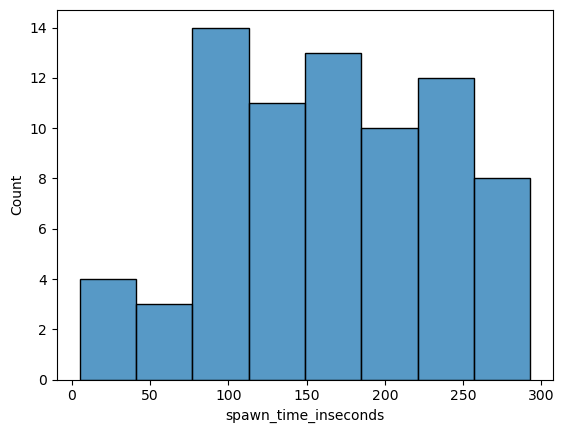

In [81]:
sns.histplot(lt_300['spawn_time_inseconds'])

Let's Try to get a pie chart for this as well. But For that I will make a new column which will have the category <300 and >=300.

In [ ]:
for i in spawntime_df['spawn_time_inseconds']:
    if i < 300:
        

In [83]:
spawntime_df['lt_or_gt300'] = ["<300" if i<300 else ">=300" for i in spawntime_df['spawn_time_inseconds']]

C:\Users\OmGusain\AppData\Local\Temp\ipykernel_10400\2487492852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spawntime_df['lt_or_gt300'] = ["<300" if i<300 else ">=300" for i in spawntime_df['spawn_time_inseconds']]


In [84]:
spawntime_df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,no_of_weaknesss,lt_or_gt_4,no_of_multipliers,spawn_time_inseconds,lt_or_gt300
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25,2.0,...,2000,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4,>=4,1,1200,>=300
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,NaN,...,0700,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4,>=4,2,420,>=300
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,0,NaN,...,1130,0,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4,>=4,0,690,>=300
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25,2.0,...,0845,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3,<4,1,525,>=300
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100,NaN,...,1900,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3,<4,1,1140,>=300


<AxesSubplot:title={'center':'Spawn time Of Pokemons'}, ylabel='lt_or_gt300'>

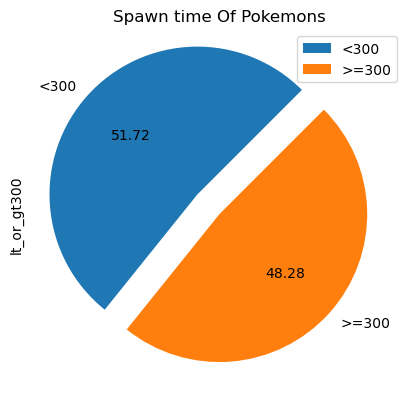

In [85]:
spawntime_df['lt_or_gt300'].value_counts().plot.pie(startangle = 45, legend=True, autopct="%.2f", explode=(0.2, 0), title="Spawn time Of Pokemons")

c:\Users\OmGusain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lt_or_gt300', ylabel='count'>

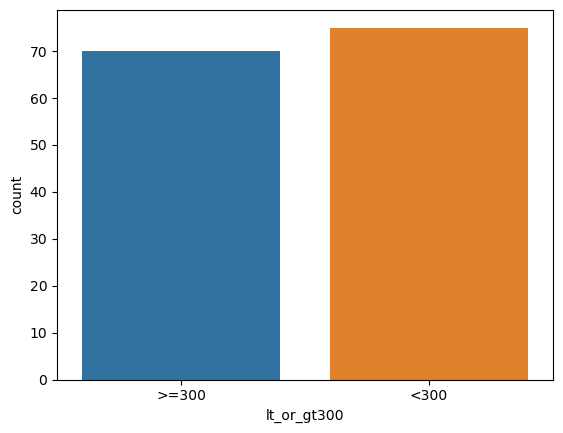

In [86]:
sns.countplot(spawntime_df['lt_or_gt300'])

#### Conclusion: So we can conclude that, there are more than 70 or 51.72% pokemons with spawn time less than 300 seconds and almost about 70 or 48.28% pokemons with spawn time more than 300 seconds. 

NOTE: These numbers are out of 145 rather than 151 assuming the 6 pokemons don't spawn. 

## Get all the pokemons with more than 2 capabilities

In [87]:
df_copy.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,...,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,no_of_weaknesss,lt_or_gt_4,no_of_multipliers,spawn_time_inseconds
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25,2.0,...,69,2000,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,4,>=4,1,1200
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,NaN,...,4,0700,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",4,>=4,2,420
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,0,NaN,...,2,1130,0,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",4,>=4,0,690
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25,2.0,...,25,0845,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,3,<4,1,525
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100,NaN,...,1,1900,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",3,<4,1,1140


In [88]:
df_copy.columns

Index(['id', 'num', 'name', 'img', 'type', 'height', 'weight', 'candy',
       'candy_count', 'egg', 'spawn_chance', 'avg_spawns', 'spawn_time',
       'multipliers', 'weaknesses', 'next_evolution', 'prev_evolution',
       'no_of_weaknesss', 'lt_or_gt_4', 'no_of_multipliers',
       'spawn_time_inseconds'],
      dtype='object')

In [89]:
# Let's drop some columns that we don't need, for convinience.

df_copy = df_copy.drop(columns=['no_of_weaknesss', 'lt_or_gt_4', 'no_of_multipliers','spawn_time_inseconds'], axis=1)

In [90]:
df_copy.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25,2.0,>=5%,69,2000,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,NaN,<5%,4,0700,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,0,NaN,<5%,2,1130,0,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25,2.0,>=5%,25,0845,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100,NaN,<5%,1,1900,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [91]:
df_copy['type']

0       ['Grass', 'Poison']
1       ['Grass', 'Poison']
2       ['Grass', 'Poison']
3                  ['Fire']
4                  ['Fire']
               ...         
146              ['Dragon']
147              ['Dragon']
148    ['Dragon', 'Flying']
149             ['Psychic']
150             ['Psychic']
Name: type, Length: 151, dtype: object

First, I will get the number of types each pokemon is. I will store that number in a list. Then I will create a new column.

In [92]:
df_copy['no_of_types'] = [len(i.split(", ")) for i in df_copy['type']]

In [93]:
df_copy.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,no_of_types
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71,6.9,Bulbasaur Candy,25,2.0,>=5%,69,2000,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,2
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99,13.0,Bulbasaur Candy,100,NaN,<5%,4,0700,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",2
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01,100.0,Bulbasaur Candy,0,NaN,<5%,2,1130,0,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",2
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61,8.5,Charmander Candy,25,2.0,>=5%,25,0845,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,1
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09,19.0,Charmander Candy,100,NaN,<5%,1,1900,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",1


Now that we have our desired Column, we can plot

<AxesSubplot:xlabel='no_of_types', ylabel='Count'>

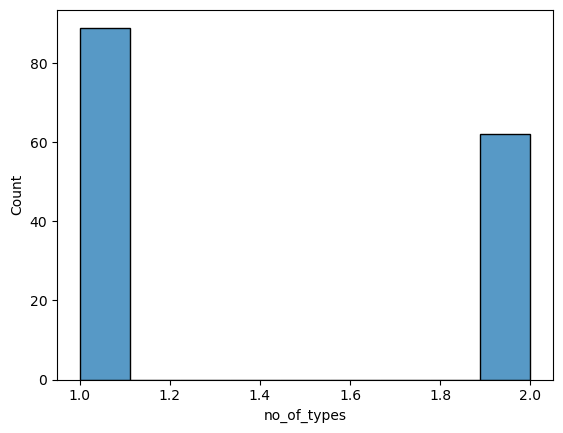

In [94]:
sns.histplot(df_copy['no_of_types'])

c:\Users\OmGusain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_types', ylabel='count'>

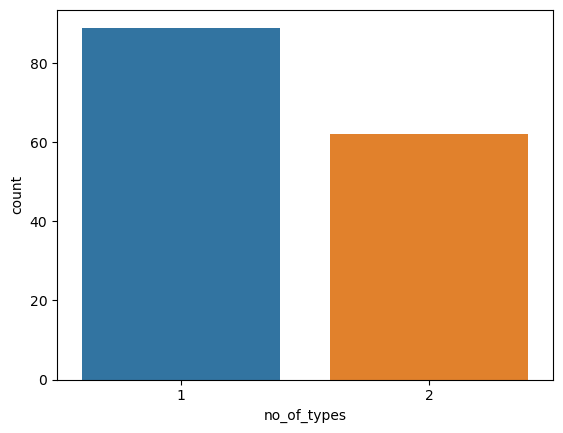

In [95]:
sns.countplot(df_copy['no_of_types'])

<AxesSubplot:title={'center':'No of Types of Pokemon'}, ylabel='no_of_types'>

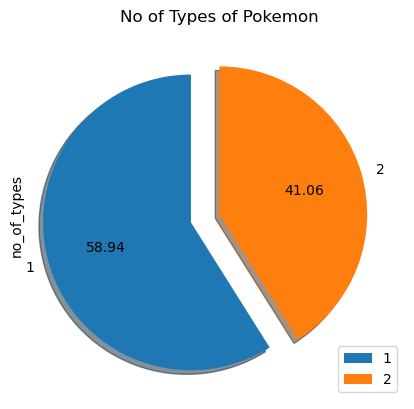

In [97]:
df_copy['no_of_types'].value_counts().plot.pie(startangle=90, legend=True, explode=(0.2, 0), title="No of Types of Pokemon", shadow=True, autopct="%.2f")

#### Conclusion: We can conclude that there are about 41.06% or more than 60 pokemons with 2 types of capabilities and 58.94 or more than 80 pokemons with 1 type of capability. 